<a href="https://colab.research.google.com/github/maticvl/dataHacker/blob/master/NN/NN_K_ShallowNN_Moons_dataset.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import numpy as np
import matplotlib.pyplot as plt
import keras
import tensorflow as tf
from mpl_toolkits import mplot3d
from matplotlib import cm
from keras.models import Sequential
from keras.layers import Dense
from keras import backend as K
from keras.wrappers.scikit_learn import KerasClassifier
from keras.optimizers import adam
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import cross_val_score
from sklearn.datasets import make_circles
from sklearn.model_selection import train_test_split
from sklearn.datasets import make_moons
plt.style.use('ggplot')

Using TensorFlow backend.


# 1. Create an artificial dataset

In [0]:
# fix random seed for reproducibility
seed = 7
np.random.seed(seed)

# generate two datasets and print their shape
X,y = make_moons(n_samples = 6000, noise = 0.08)
print('X:\t{}' .format(X.shape))
print('y:\t{}' .format(y.shape))
print(type(X))
print(type(y))

# split data into train and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

# shape of training and test set
print('X_train:\t{}' .format(X_train.shape))
print('y_train:\t{}' .format(y_train.shape))
print('X_test:\t\t{}'.format(X_test.shape))
print('y_test:\t\t{}'.format(y_test.shape))

X:	(6000, 2)
y:	(6000,)
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
X_train:	(4020, 2)
y_train:	(4020,)
X_test:		(1980, 2)
y_test:		(1980,)


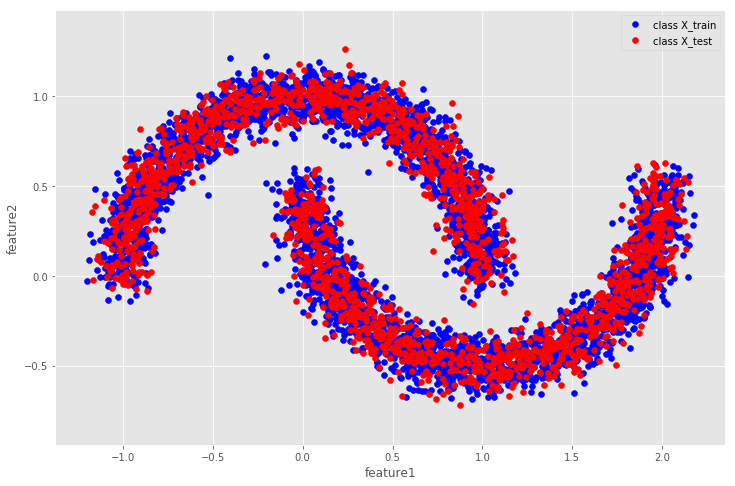

In [0]:
plt.figure(figsize=(12,8))
plt.scatter(X_train[:,0],X_train[:,1], color = 'b', label = 'class X_train')
plt.scatter(X_test[:,0],X_test[:,1], color = 'r', label = 'class X_test')
plt.xlabel('feature1')
plt.ylabel('feature2')
plt.legend()
plt.axis('equal')
plt.show()

# 2. Implementing a Neural Network


In [0]:
# Hyper-parameters
training_epochs = 100 #Total number of training epochs
learning_rate = 0.03 # The learning rate

In [0]:
# create model
def create_model():
  model = Sequential()
  # Input layer
  model.add(Dense(4, input_dim=2, kernel_initializer='normal', activation='tanh'))
  # Hidden layer
  model.add(Dense(6, activation='relu'))
  # Output layer
  model.add(Dense(1, activation='sigmoid'))
 
  # Compile model
  model.compile(loss='binary_crossentropy', optimizer=adam(learning_rate), metrics=['accuracy'])
  return model

In [0]:
# make a shallow neural network
model = create_model()
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 4)                 12        
_________________________________________________________________
dense_2 (Dense)              (None, 6)                 30        
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 7         
Total params: 49
Trainable params: 49
Non-trainable params: 0
_________________________________________________________________


In [0]:
# training 
results = model.fit(
 X_train, y_train.T,
 epochs= training_epochs,
 batch_size = 516,
 validation_data = (X_test, y_test.T)
)

Train on 4020 samples, validate on 1980 samples
Epoch 1/100
4020/4020 [==============================] - 0s 62us/step - loss: 0.5961 - acc: 0.7828 - val_loss: 0.4694 - val_acc: 0.8182
Epoch 2/100
4020/4020 [==============================] - 0s 3us/step - loss: 0.3948 - acc: 0.8279 - val_loss: 0.3013 - val_acc: 0.8596
Epoch 3/100
4020/4020 [==============================] - 0s 4us/step - loss: 0.2834 - acc: 0.8659 - val_loss: 0.2457 - val_acc: 0.8783
Epoch 4/100
4020/4020 [==============================] - 0s 4us/step - loss: 0.2620 - acc: 0.8701 - val_loss: 0.2458 - val_acc: 0.8818
Epoch 5/100
4020/4020 [==============================] - 0s 4us/step - loss: 0.2576 - acc: 0.8803 - val_loss: 0.2393 - val_acc: 0.8899
Epoch 6/100
4020/4020 [==============================] - 0s 4us/step - loss: 0.2508 - acc: 0.8818 - val_loss: 0.2443 - val_acc: 0.8854
Epoch 7/100
4020/4020 [==============================] - 0s 4us/step - loss: 0.2539 - acc: 0.8781 - val_loss: 0.2380 - val_acc: 0.8929
Epoch 

Epoch 61/100
4020/4020 [==============================] - 0s 4us/step - loss: 8.6256e-04 - acc: 1.0000 - val_loss: 9.0010e-04 - val_acc: 1.0000
Epoch 62/100
4020/4020 [==============================] - 0s 3us/step - loss: 8.6304e-04 - acc: 1.0000 - val_loss: 9.1641e-04 - val_acc: 1.0000
Epoch 63/100
4020/4020 [==============================] - 0s 4us/step - loss: 8.0682e-04 - acc: 1.0000 - val_loss: 8.4992e-04 - val_acc: 1.0000
Epoch 64/100
4020/4020 [==============================] - 0s 4us/step - loss: 7.9586e-04 - acc: 1.0000 - val_loss: 8.3932e-04 - val_acc: 1.0000
Epoch 65/100
4020/4020 [==============================] - 0s 4us/step - loss: 7.4958e-04 - acc: 1.0000 - val_loss: 7.9362e-04 - val_acc: 1.0000
Epoch 66/100
4020/4020 [==============================] - 0s 4us/step - loss: 7.4592e-04 - acc: 1.0000 - val_loss: 7.7293e-04 - val_acc: 1.0000
Epoch 67/100
4020/4020 [==============================] - 0s 5us/step - loss: 7.0312e-04 - acc: 1.0000 - val_loss: 7.8319e-04 - val_acc:

In [0]:
print('Mean value of accuracy during training time is : %.2f' %np.mean(results.history["val_acc"]))

Mean value of accuracy during training time is : 0.97


In [0]:
prediction_values = model.predict_classes(X_test)
prediction_values.shape # our neural network outputs predictions of labels for training set

(1980, 1)

In [0]:
print(model.metrics_names[:])

['loss', 'acc']


In [0]:
# evaluate the model
scores = model.evaluate(X_train,y_train.T)
print("\n%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))

4020/4020 [==============================] - 0s 16us/step

acc: 100.00%


In [0]:
scores

[0.000317781601684395, 1.0]

Maximum Loss : 0.5961

Minimum Loss : 0.0003

Loss difference : 0.5958


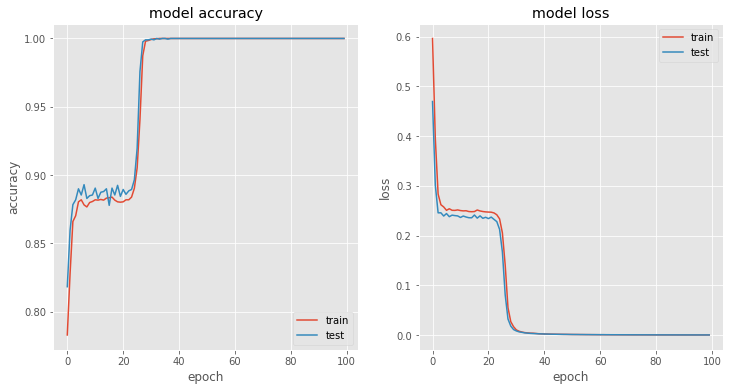

In [0]:
plt.figure(figsize =(12,6))
# summarize history for accuracy
plt.subplot(121)
plt.plot(results.history['acc'])
plt.plot(results.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='lower right')

# summarize history for loss
plt.subplot(122)
plt.plot(results.history['loss'])
plt.plot(results.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper right')

max_loss = np.max(results.history['loss'])
min_loss = np.min(results.history['loss'])
print("Maximum Loss : {:.4f}".format(max_loss))
print("")
print("Minimum Loss : {:.4f}".format(min_loss))
print("")
print("Loss difference : {:.4f}".format((max_loss - min_loss)))

# 3. Visualization

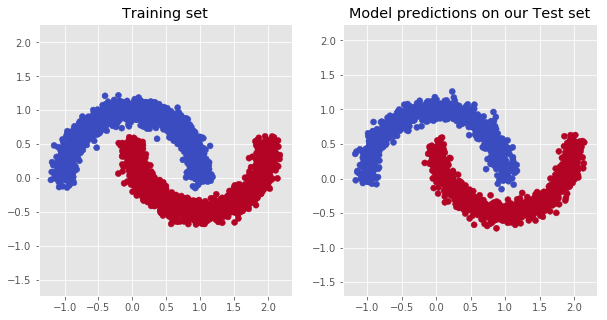

In [0]:
plt.figure(figsize=(10,5))
plt.subplot(121)
plt.scatter(X_train[:,0], X_train[:,1], c=y_train ,cmap=cm.coolwarm)
plt.title('Training set')
plt.axis('equal');

plt.subplot(122)
plt.scatter(X_test[:,0], X_test[:,1], c=prediction_values[:,0], cmap=cm.coolwarm)
plt.title('Model predictions on our Test set')
plt.axis('equal');

Text(0.5, 1.0, 'Model predictions on our Test set')

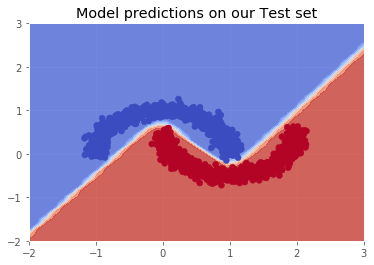

In [0]:
xx = np.linspace(-2, 3, 40)
yy = np.linspace(-2, 3, 40)
gx, gy = np.meshgrid(xx, yy)
Z = model.predict(np.c_[gx.ravel(), gy.ravel()])
Z = Z.reshape(gx.shape)
plt.contourf(gx, gy, Z, cmap=plt.cm.coolwarm, alpha=0.8)

axes = plt.gca()
axes.set_xlim([-2, 3])
axes.set_ylim([-2, 3])

plt.scatter(X_test[:,0], X_test[:,1], c=prediction_values[:,0], cmap=cm.coolwarm)
plt.title('Model predictions on our Test set')


In [0]:
# Input layer
weights0 = model.layers[0].get_weights()[0]
biases0 = model.layers[0].get_weights()[1]
print("Input layer weights",weights0.shape,":\n",weights0)
print("Input layer biases",biases0.shape,":\n",biases0)

# Hidden layer
weights1 = model.layers[1].get_weights()[0]
biases1 = model.layers[1].get_weights()[1]
print("\nHidden layer weights",weights1.shape,":\n",weights1)
print("Hidden layer biases",biases1.shape,":\n",biases1)

# Output layer
weights2 = model.layers[2].get_weights()[0]
biases2 = model.layers[2].get_weights()[1]
print("\nOutput layer weights",weights2.shape,":\n",weights2)
print("Output layer biases",biases2.shape,":\n",biases2)

Input layer weights (2, 4) :
 [[-0.78658575  3.595429   -0.5178937   0.84635246]
 [ 0.54770607  1.386311    0.35937604 -0.6428073 ]]
Input layer biases (4,) :
 [ 0.6728273  -1.9742489  -0.12949297  0.79643935]

Hidden layer weights (4, 6) :
 [[-1.872042    1.7700503   1.1732584  -1.2671907   1.7753398   3.7798536 ]
 [-2.7765524   1.808068   -0.85888004 -1.6723526   1.0077531   4.3001237 ]
 [-1.7382437   1.673955    3.0108829  -1.8534544   0.5028867   3.0627003 ]
 [ 1.7765884   0.2618922  -4.4669104   1.6604413  -0.05116786 -0.77444965]]
Hidden layer biases (6,) :
 [ 0.80407184  0.37974504 -0.15916505  0.8087894   0.5815605   0.99001366]

Output layer weights (6, 1) :
 [[ 2.5611756]
 [-1.1650364]
 [-2.8736846]
 [ 1.6730642]
 [-1.2050943]
 [-4.579054 ]]
Output layer biases (1,) :
 [-0.5096773]


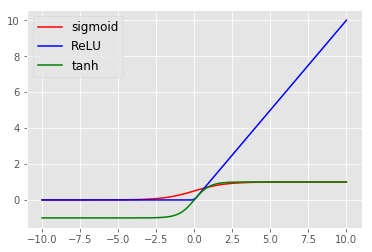

In [0]:
def sigmoid(z):
    return 1./(1+np.exp(-z))

def ReLU(z):
    return np.maximum(0,z)
  
def tanh(z):
    return np.tanh(z)
  
z = np.linspace(-10,10,100)
plt.plot(z, sigmoid(z),'r', label = 'sigmoid')
plt.plot(z, ReLU(z),'b',label ='ReLU')
plt.plot(z, tanh(z),'g',label ='tanh')
plt.legend(fontsize=12)

In [0]:
x1 = np.linspace(-2,2,50)
x2 = np.linspace(-2,2,50)
x3 = np.linspace(-1,1,50*50)

result = np.zeros((50*50,3)) 

out11 = np.zeros((50*50, 1))
out12 = np.zeros((50*50, 1))
out13 = np.zeros((50*50, 1))
out14 = np.zeros((50*50, 1))

out21 = np.zeros((50*50, 1))
out22 = np.zeros((50*50, 1))
out23 = np.zeros((50*50, 1))
out24 = np.zeros((50*50, 1))
out25 = np.zeros((50*50, 1))
out26 = np.zeros((50*50, 1))

out31  = np.zeros((50*50, 1))

for i in range(len(x1)):
  for j in range(len(x2 )):
    # Input layer
    n11 = x1[i] * weights0[0][0] + x2[j] * weights0[1][0] + biases0[0]
    a11 = tanh(n11)

    n12 = x1[i] * weights0[0][1] + x2[j] * weights0[1][1] + biases0[1]
    a12 = tanh(n12)
    
    n13 = x1[i] * weights0[0][2] + x2[j] * weights0[1][2] + biases0[2]
    a13 = tanh(n13)

    n14 = x1[i] * weights0[0][3] + x2[j] * weights0[1][3] + biases0[3]
    a14 = tanh(n14)
  
    # Hidden layer
    n21 = a11 * weights1[0][0] + a12 * weights1[1][0] + a13 * weights1[2][0] + a14 * weights1[3][0] + biases1[0]
    a21 = ReLU(n21)

    n22 = a11 * weights1[0][1] + a12 * weights1[1][1] + a13 * weights1[2][1] + a14 * weights1[3][1] + biases1[1]
    a22 = ReLU(n22)
    
    n23 = a11 * weights1[0][2] + a12 * weights1[1][2] + a13 * weights1[2][2] + a14 * weights1[3][2] + biases1[2]
    a23 = ReLU(n23)
    
    n24 = a11 * weights1[0][3] + a12 * weights1[1][3] + a13 * weights1[2][3] + a14 * weights1[3][3] + biases1[3]
    a24 = ReLU(n24)
    
    n25 = a11 * weights1[0][4] + a12 * weights1[1][4] + a13 * weights1[2][4] + a14 * weights1[3][4] + biases1[4]
    a25 = ReLU(n25)
    
    n26 = a11 * weights1[0][5] + a12 * weights1[1][5] + a13 * weights1[2][5] + a14 * weights1[3][5] + biases1[5]
    a26 = ReLU(n26)

    # Output layer
    
    n31 = a21 * weights2[0][0] + a22 * weights2[1][0] \
        + a23 * weights2[2][0] + a24 * weights2[3][0] \
        + a25 * weights2[4][0] + a26 * weights2[5][0] \
        + biases2[0]
    a31 = sigmoid(n31)
    
    result[i*50+j,0 ] = x1[i]
    result[i*50+j, 1] = x2[j]

    out11[i*50+j] = a11
    out12[i*50+j] = a12
    out13[i*50+j] = a13
    out14[i*50+j] = a14
    
    out21[i*50+j] = a21
    out22[i*50+j] = a22
    out23[i*50+j] = a23
    out24[i*50+j] = a24
    out25[i*50+j] = a25
    out26[i*50+j] = a26
    
    out31[i*50+j] = a31

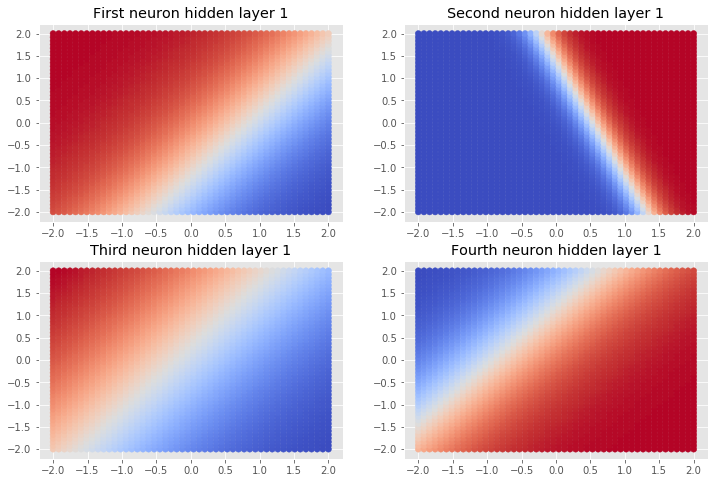

In [0]:
plt.figure(figsize =(12,8))

# First neuron, input layer
plt.subplot(221)
plt.title('First neuron hidden layer 1')
plt.scatter(result[:, 0], result[:, 1], c= out11.reshape(-1), cmap=cm.coolwarm)

# Second neuron, input layer
plt.subplot(222)
plt.title('Second neuron hidden layer 1')
plt.scatter(result[:, 0], result[:, 1], c= out12.reshape(-1), cmap=cm.coolwarm)

# Third neuron, input layer
plt.subplot(223)
plt.title('Third neuron hidden layer 1')
plt.scatter(result[:, 0], result[:, 1], c= out13.reshape(-1), cmap=cm.coolwarm)

# Fourth neuron, input layer
plt.subplot(224)
plt.title('Fourth neuron hidden layer 1')
plt.scatter(result[:, 0], result[:, 1], c= out14.reshape(-1), cmap=cm.coolwarm)

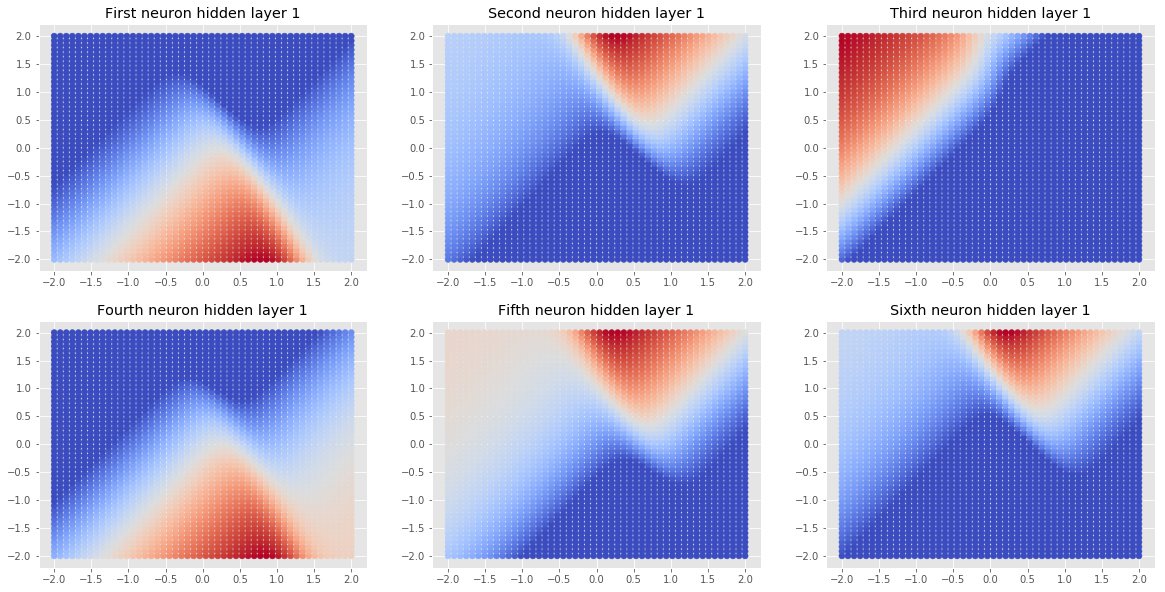

In [0]:
# First neuron, hidden layer
plt.figure(figsize = (20,10))
plt.subplot(231) 
plt.title('First neuron hidden layer 1')
plt.scatter(result[:, 0], result[:, 1], c= out21.reshape(-1), cmap=cm.coolwarm)

# Second neuron, hidden layer
plt.subplot(232)
plt.title('Second neuron hidden layer 1')
plt.scatter(result[:, 0], result[:, 1], c= out22.reshape(-1), cmap=cm.coolwarm)

# Third neuron, hidden layer
plt.subplot(233)
plt.title('Third neuron hidden layer 1')
plt.scatter(result[:, 0], result[:, 1], c= out23.reshape(-1), cmap=cm.coolwarm)

# Fourth neuron, hidden layer
plt.subplot(234)
plt.title('Fourth neuron hidden layer 1')
plt.scatter(result[:, 0], result[:, 1], c= out24.reshape(-1), cmap=cm.coolwarm)

# Fifth neuron, hidden layer
plt.subplot(235)
plt.title('Fifth neuron hidden layer 1')
plt.scatter(result[:, 0], result[:, 1], c= out25.reshape(-1), cmap=cm.coolwarm)

# Sixth neuron, hidden layer
plt.subplot(236)
plt.title('Sixth neuron hidden layer 1')
plt.scatter(result[:, 0], result[:, 1], c= out26.reshape(-1), cmap=cm.coolwarm)

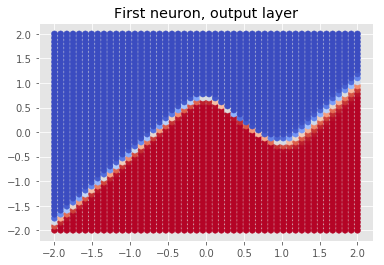

In [0]:
# first neuron, output layer
plt.title('First neuron, output layer')
plt.scatter(result[:, 0], result[:, 1], c= out31.reshape(-1), cmap=cm.coolwarm)

Text(0.5, 0.92, '3D visualization of our neural network first layer fourth neuron')

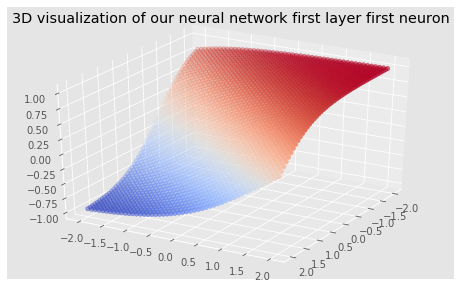

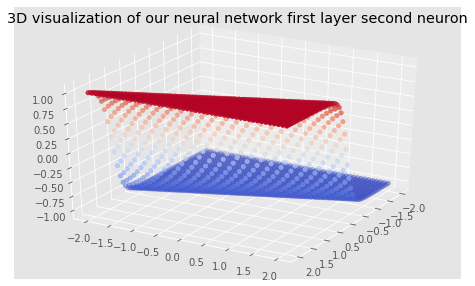

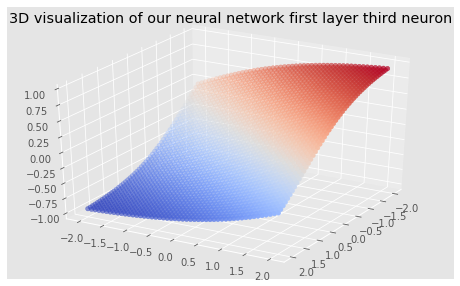

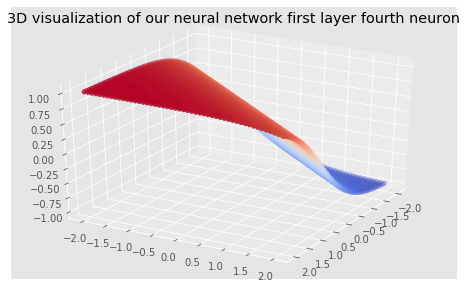

In [0]:
fig = plt.figure(figsize=(8, 5))
ax = plt.axes(projection='3d')
bar = ax.scatter3D(result[:, 0],result[:, 1],out11.reshape(-1), c=out11.reshape(-1), cmap=cm.coolwarm);
ax.view_init(30, 30)
ax.set_title('3D visualization of our neural network first layer first neuron')

fig = plt.figure(figsize=(8, 5))
ax = plt.axes(projection='3d')
bar = ax.scatter3D(result[:, 0],result[:, 1],out12.reshape(-1), c=out12.reshape(-1), cmap=cm.coolwarm);
ax.view_init(30, 30)
ax.set_title('3D visualization of our neural network first layer second neuron')

fig = plt.figure(figsize=(8, 5))
ax = plt.axes(projection='3d')
bar = ax.scatter3D(result[:, 0],result[:, 1],out13.reshape(-1), c=out13.reshape(-1), cmap=cm.coolwarm);
ax.view_init(30, 30)
ax.set_title('3D visualization of our neural network first layer third neuron')

fig = plt.figure(figsize=(8, 5))
ax = plt.axes(projection='3d')
bar = ax.scatter3D(result[:, 0],result[:, 1],out14.reshape(-1), c=out14.reshape(-1), cmap=cm.coolwarm);
ax.view_init(30, 30)
ax.set_title('3D visualization of our neural network first layer fourth neuron')

Text(0.5, 0.92, '3D visualization of our neural network second layer sixht neuron')

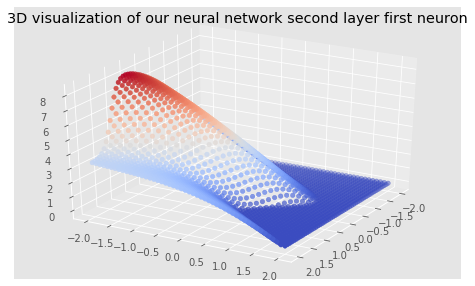

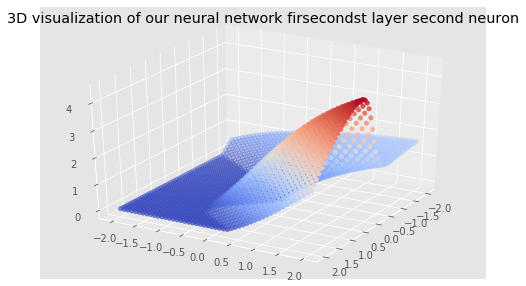

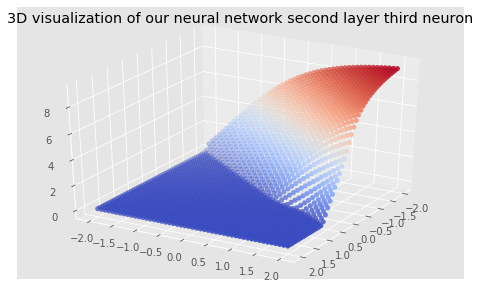

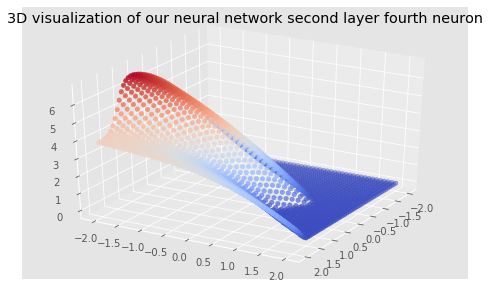

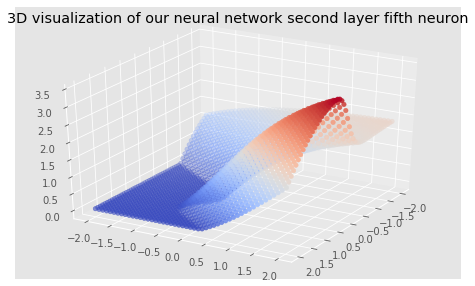

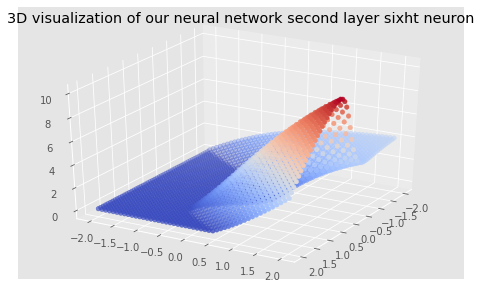

In [0]:
fig = plt.figure(figsize=(8, 5))
ax = plt.axes(projection='3d')
bar = ax.scatter3D(result[:, 0],result[:, 1],out21.reshape(-1), c=out21.reshape(-1), cmap=cm.coolwarm);
ax.view_init(30, 30)
ax.set_title('3D visualization of our neural network second layer first neuron')

fig = plt.figure(figsize=(8, 5))
ax = plt.axes(projection='3d')
bar = ax.scatter3D(result[:, 0],result[:, 1],out22.reshape(-1), c=out22.reshape(-1), cmap=cm.coolwarm);
ax.view_init(30, 30)
ax.set_title('3D visualization of our neural network firsecondst layer second neuron')

fig = plt.figure(figsize=(8, 5))
ax = plt.axes(projection='3d')
bar = ax.scatter3D(result[:, 0],result[:, 1],out23.reshape(-1), c=out23.reshape(-1), cmap=cm.coolwarm);
ax.view_init(30, 30)
ax.set_title('3D visualization of our neural network second layer third neuron')

fig = plt.figure(figsize=(8, 5))
ax = plt.axes(projection='3d')
bar = ax.scatter3D(result[:, 0],result[:, 1],out24.reshape(-1), c=out24.reshape(-1), cmap=cm.coolwarm);
ax.view_init(30, 30)
ax.set_title('3D visualization of our neural network second layer fourth neuron')

fig = plt.figure(figsize=(8, 5))
ax = plt.axes(projection='3d')
bar = ax.scatter3D(result[:, 0],result[:, 1],out25.reshape(-1), c=out25.reshape(-1), cmap=cm.coolwarm);
ax.view_init(30, 30)
ax.set_title('3D visualization of our neural network second layer fifth neuron')

fig = plt.figure(figsize=(8, 5))
ax = plt.axes(projection='3d')
bar = ax.scatter3D(result[:, 0],result[:, 1],out26.reshape(-1), c=out26.reshape(-1), cmap=cm.coolwarm);
ax.view_init(30, 30)
ax.set_title('3D visualization of our neural network second layer sixht neuron')


Text(0.5, 0.92, '3D visualization of our neural network output layer first neuron')

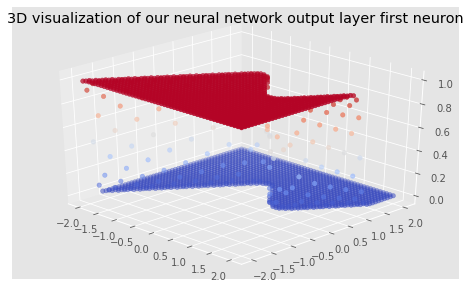

In [0]:
fig = plt.figure(figsize=(8, 5))
ax = plt.axes(projection='3d')
bar = ax.scatter3D(result[:, 0],result[:, 1],out31.reshape(-1), c=out31.reshape(-1), cmap=cm.coolwarm);
ax.view_init(30,-45)
ax.set_title('3D visualization of our neural network output layer first neuron')